In [375]:
import pandas as pd
import numpy as np

In [376]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [377]:
from sklearn.metrics import r2_score

In [378]:
df_train=pd.read_csv("/content/train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [379]:
df_train.shape

(112936, 12)

In [380]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112936 entries, 0 to 112935
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     112936 non-null  int64  
 1   Product_ID                  112936 non-null  object 
 2   Gender                      112936 non-null  object 
 3   Age                         112936 non-null  object 
 4   Occupation                  112936 non-null  int64  
 5   City_Category               112936 non-null  object 
 6   Stay_In_Current_City_Years  112936 non-null  object 
 7   Marital_Status              112936 non-null  int64  
 8   Product_Category_1          112936 non-null  int64  
 9   Product_Category_2          77794 non-null   float64
 10  Product_Category_3          34540 non-null   float64
 11  Purchase                    112935 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 10.3+ MB


In [381]:
df_train[112935:112936]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
112935,1005434,P00058042,F,26-35,7,A,1,1,8,16.0,NaN,NaN


product category 2 and 3 has nan values, now we don't know what is that since it is masked data. either we can fill it with 0 or with 1 or with mean value, we will drop product category 2 and 3  since is contains 30% missing data and maritial status as it do not makes any sence in product price

In [382]:
df_train=df_train.drop(columns = ['Product_Category_2', 'Product_Category_3','Marital_Status'])

In [383]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,3,8370.0
1,1000001,P00248942,F,0-17,10,A,2,1,15200.0
2,1000001,P00087842,F,0-17,10,A,2,12,1422.0
3,1000001,P00085442,F,0-17,10,A,2,12,1057.0
4,1000002,P00285442,M,55+,16,C,4+,8,7969.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad91510450>,
      dtype=object)

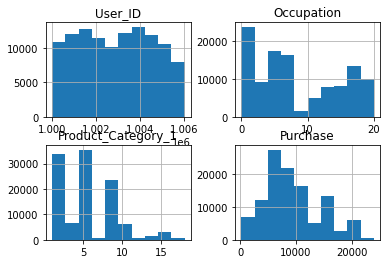

In [384]:
df_train.hist()

One hot encoding

In [385]:
df_train['Product_ID']=df_train['Product_ID'].str.replace('P00', '')

In [386]:
df_train['Gender']=df_train['Gender'].map({'M':0,'F':1})

In [387]:
column=['Age','City_Category','Stay_In_Current_City_Years']

In [388]:
df_train=pd.get_dummies(df_train, columns=column)

In [389]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112936 entries, 0 to 112935
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   User_ID                        112936 non-null  int64  
 1   Product_ID                     112936 non-null  object 
 2   Gender                         112936 non-null  int64  
 3   Occupation                     112936 non-null  int64  
 4   Product_Category_1             112936 non-null  int64  
 5   Purchase                       112935 non-null  float64
 6   Age_0-17                       112936 non-null  uint8  
 7   Age_18-25                      112936 non-null  uint8  
 8   Age_26-35                      112936 non-null  uint8  
 9   Age_36-45                      112936 non-null  uint8  
 10  Age_46-50                      112936 non-null  uint8  
 11  Age_51-55                      112936 non-null  uint8  
 12  Age_55+                       

In [390]:
df_train['Purchase']=df_train['Purchase'].fillna(df_train['Purchase'].mean())

In [391]:
df_train.head()

,User_ID,Product_ID,Gender,Occupation,Product_Category_1,Purchase,Age_0-17,Age_18-25,Age_26-35,Age_36-45,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,069042,1,10,3,8370.0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1000001,248942,1,10,1,15200.0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1000001,087842,1,10,12,1422.0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1000001,085442,1,10,12,1057.0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,1000002,285442,0,16,8,7969.0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [392]:
df_train.corr()

,User_ID,Gender,Occupation,Product_Category_1,Purchase,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
User_ID,1.000000,0.030109,-0.023150,0.002799,0.005321,-0.024451,-0.062288,0.034941,0.012533,0.026443,-0.006289,0.002048,-0.044212,0.023036,0.017653,0.003010,0.028066,0.018619,-0.032876,-0.025540
Gender,0.030109,1.000000,-0.116511,0.045131,-0.060348,0.035069,0.001187,-0.032029,-0.000393,0.030608,0.008217,-0.003961,-0.009820,0.009076,-0.000307,-0.020753,0.034110,-0.010396,0.015643,-0.030517
Occupation,-0.023150,-0.116511,1.000000,-0.005588,0.017287,0.017530,-0.097459,-0.021964,0.058238,0.016635,0.031492,0.050180,-0.017137,-0.018357,0.035978,-0.028584,-0.003454,-0.018042,0.030821,0.018824
Product_Category_1,0.002799,0.045131,-0.005588,1.000000,-0.316334,-0.018284,-0.036486,-0.017230,0.013410,0.029606,0.022040,0.033185,0.024263,0.001937,-0.025255,0.009226,0.003198,-0.009274,-0.011067,0.008570
Purchase,0.005321,-0.060348,0.017287,-0.316334,1.000000,-0.006654,-0.011317,-0.001132,0.007232,-0.004376,0.015059,0.002355,-0.049000,-0.021369,0.069644,-0.007923,0.003080,0.003884,-0.001796,0.001146
Age_0-17,-0.024451,0.035069,0.017530,-0.018284,-0.006654,1.000000,-0.079244,-0.135459,-0.083518,-0.049470,-0.046005,-0.033762,-0.033049,-0.023874,0.057075,0.005639,-0.007779,0.016536,0.008818,-0.022062
Age_18-25,-0.062288,0.001187,-0.097459,-0.036486,-0.011317,-0.079244,1.000000,-0.385830,-0.237887,-0.140906,-0.131037,-0.096165,0.008203,0.014912,-0.023761,0.046642,-0.033648,0.012126,-0.022691,0.010884
Age_26-35,0.034941,-0.032029,-0.021964,-0.017230,-0.001132,-0.135459,-0.385830,1.000000,-0.406639,-0.240861,-0.223992,-0.164383,0.119203,-0.005103,-0.108466,-0.026586,0.005023,-0.007426,0.013266,0.012681
Age_36-45,0.012533,-0.000393,0.058238,0.013410,0.007232,-0.083518,-0.237887,-0.406639,1.000000,-0.148505,-0.138104,-0.101352,-0.024171,0.008429,0.014098,-0.007721,-0.012122,0.005097,0.045317,-0.029522
Age_46-50,0.026443,0.030608,0.016635,0.029606,-0.004376,-0.049470,-0.140906,-0.240861,-0.148505,1.000000,-0.081802,-0.060033,-0.069773,0.016004,0.049589,0.009164,0.026806,-0.012797,-0.030922,0.002011


In [393]:
X=df_train.loc[:,df_train.columns!="Purchase"].values
y=df_train["Purchase"].values

In [394]:
X.shape

(112936, 20)

Scale the data

In [395]:
scale=StandardScaler()
X=scale.fit_transform(X)

fit model 

In [396]:
import xgboost as xgb
model = xgb.XGBRegressor(learning_rate = 0.1, n_estimators=100, verbosity = 0)
model.fit(X,y)
pred=model.predict(X)
r2_score(y,pred)

0.6535689342166426

In [397]:
model.score(X,y)

0.6535689342166426

Test data

In [398]:
df_test=pd.read_csv("/content/test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


test data preprocessing

In [399]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [401]:
df_test=df_test.drop(columns=['Product_Category_2', 'Product_Category_3','Marital_Status'])

In [402]:
 df_test['Product_ID']=df_test['Product_ID'].str.replace('P00', '')

In [403]:
df_test['Gender']=df_test['Gender'].map({'M':0,'F':1})

In [404]:
df_test=pd.get_dummies(df_test, columns=column)

In [405]:
df_test.head()

,User_ID,Product_ID,Gender,Occupation,Product_Category_1,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000004,128942,0,7,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,1000009,113442,0,17,3,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
2,1000010,288442,1,1,5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,1000010,145342,1,1,4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,1000011,053842,1,1,4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0


In [406]:
df_test.shape

(233599, 20)

In [407]:
df_train.shape#exclude purchase column it is 23

(112936, 21)

In [408]:
X_test=df_test.values

In [409]:
X_test=scale.transform(X_test)

In [410]:
y_test=model.predict(X_test)

In [411]:
data_submit=df_test['User_ID']

In [412]:
data_submit=y_test